In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from collections import defaultdict

In [2]:
x_train = pd.read_csv('train.csv')

In [3]:
x_train.shape

(1460, 81)

In [4]:
del x_train['Id']

In [5]:
y_train = x_train['SalePrice']

In [6]:
del x_train['SalePrice']

In [7]:
y_train = y_train.to_numpy()

In [8]:
y_train.shape

(1460,)

In [9]:
def differentiate_features(x_train):
    discrete_features = []
    continuous_features = []
    for i,j in zip(x_train,x_train.dtypes):
        if j.type==np.int64 or j.type==np.float64:
            continuous_features.append(i)
        else:
            discrete_features.append(i)
    return discrete_features,continuous_features

In [10]:
discrete_features,continuous_features = differentiate_features(x_train)

In [11]:
def generate_index_map(x_train,discrete_features):
    index_map = {}
    for i in x_train.filter(discrete_features):
        index_map[i]={}
        for item in x_train[i].fillna('').unique():
            if item!='' and item.lower() not in index_map[i]:
                index_map[i][item.lower()] = len(index_map[i]) + 1
    return index_map

In [12]:
index_map = generate_index_map(x_train,discrete_features)

In [13]:
def generate_feature_mean(x_train,continuous_features,discrete_features,index_map):
    feat_mean_dict = {}
    for col in continuous_features:
        feat_mean_dict[col] = x_train[col].mean()
    for col in discrete_features:
        feat_mean_dict[col] = sum(list(index_map[col].values()))/len(index_map[col])
    return feat_mean_dict

In [14]:
feat_mean_dict = generate_feature_mean(x_train,continuous_features,discrete_features,index_map)

In [15]:
def remove_noise_cont_feature(data,continuous_features,feat_mean_dict):
    for col in continuous_features:
        data = data.fillna(value={col:feat_mean_dict[col]})
    return data

In [16]:
x_train = remove_noise_cont_feature(x_train,continuous_features,feat_mean_dict)

In [17]:
def remove_noise_disc_feature(data,discrete_features,feat_mean_dict,index_map):
    for col in discrete_features:
        data[col] = data[col].fillna('').apply(lambda x: index_map[col][x.lower()] if x.lower() in index_map[col] else feat_mean_dict[col])
    return data

In [18]:
x_train = remove_noise_disc_feature(x_train,discrete_features,feat_mean_dict,index_map)

In [19]:
def get_feature_mean(x_train,feat_mean_dict):
    feature_mean = []
    for col in x_train.columns:
        try:
            feature_mean.append(feat_mean_dict[col])
        except:
            feature_mean.append(feat_mean_dict[col])

    feature_mean = np.array(feature_mean)
    return feature_mean

In [20]:
feature_mean = get_feature_mean(x_train,feat_mean_dict)

In [21]:
x = x_train.to_numpy()

In [24]:
xstd = x.mean(0)

In [26]:
x = (x - feature_mean)/xstd

In [27]:
x.shape

(1460, 79)

In [28]:
x = np.concatenate([np.ones((len(x),1)),x],axis=1)

In [29]:
m,n = x.shape
m,n

(1460, 80)

In [30]:
ymean = y_train.mean()
ystd = y_train.std()
ymean,ystd

(180921.19589041095, 79415.29188606751)

In [31]:
y_train = (y_train-y_train.mean())/y_train.std()

In [32]:
# mean square error
def mse(preds,actual):
    return ((preds-actual)**2).sum()/(2*len(preds))

In [33]:
def derivative_w(y,y_train,x):
    dw = np.matmul((y-y_train),x)/m
    return dw

In [46]:
epochs = 100
w = np.random.random((n))
lr = 1e-3

In [47]:
loss=0
for epoch in range(epochs):
    y = np.matmul(x,w)
    loss = mse(y,y_train)
    print('Epoch ',epoch,':-',loss)
    dw = derivative_w(y,y_train,x)
    w = w - lr*dw

Epoch  0 :- 437.0589237772281
Epoch  1 :- 336.3207925489368
Epoch  2 :- 263.3260262334873
Epoch  3 :- 209.34598654282442
Epoch  4 :- 168.64929000973493
Epoch  5 :- 137.4203392876566
Epoch  6 :- 113.0782670254786
Epoch  7 :- 93.84609869884237
Epoch  8 :- 78.47664883986819
Epoch  9 :- 66.07688981387355
Epoch  10 :- 55.99442693709622
Epoch  11 :- 47.74333428565249
Epoch  12 :- 40.955087937152335
Epoch  13 :- 35.345623145496965
Epoch  14 :- 30.692846480518206
Epoch  15 :- 26.821002892840404
Epoch  16 :- 23.589596641301394
Epoch  17 :- 20.885383485773193
Epoch  18 :- 18.61646956156713
Epoch  19 :- 16.707882043482652
Epoch  20 :- 15.098187998669035
Epoch  21 :- 13.736874390620159
Epoch  22 :- 12.582291367565396
Epoch  23 :- 11.600019902800655
Epoch  24 :- 10.761564354731876
Epoch  25 :- 10.04329741133575
Epoch  26 :- 9.425603519173702
Epoch  27 :- 8.892180048559302
Epoch  28 :- 8.42946490482084
Epoch  29 :- 8.026166226456905
Epoch  30 :- 7.67287498160732
Epoch  31 :- 7.361745196303319
Epoch 

In [48]:
x_test = pd.read_csv('test.csv')

In [49]:
y_test = pd.read_csv('sample_submission.csv')

In [50]:
y_test = y_test['SalePrice'].to_numpy()

In [51]:
del x_test['Id']

In [52]:
x_test = remove_noise_cont_feature(x_test,continuous_features,feat_mean_dict)

In [53]:
x_test = remove_noise_disc_feature(x_test,discrete_features,feat_mean_dict,index_map)

In [54]:
x_test = x_test.to_numpy()

In [55]:
x_test = (x_test - feature_mean)/xstd

In [56]:
x_test = np.concatenate([np.ones((len(x_test),1)),x_test],axis=1)

In [57]:
preds = np.matmul(x_test,w)

In [58]:
y_test = (y_test-ymean)/ystd

In [59]:
mse(preds,y_test)

3.6079149935628125

In [60]:
preds

array([-0.68387414,  1.36433069,  0.99579062, ...,  0.03842964,
       -0.63224161,  3.35581584])

In [64]:
x_test.mean(1)

array([-0.61690024,  2.91634173, -0.73851798, ..., -0.68601002,
       -0.34800346, -0.62905421])

In [66]:
import matplotlib.pyplot as plt

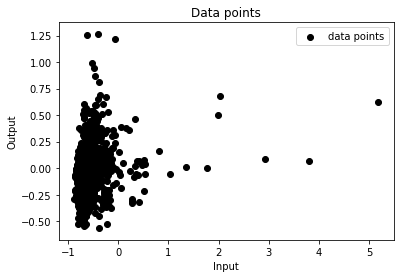

In [71]:
# plot of test data points
plt.scatter(x_test.mean(1),y_test,color='k',label='data points')
# plt.plot(x_test.mean(1),preds,'r',label='test',linewidth=2)

plt.title('Data points')
plt.xlabel('Input')
plt.ylabel('Output')

plt.legend()

plt.grid(False)

plt.show()

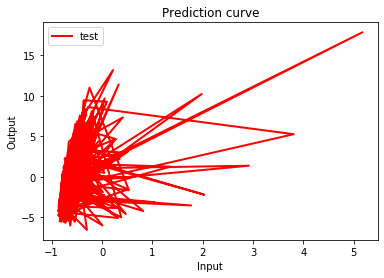

In [72]:
# plot of test data points
# plt.scatter(x_test.mean(1),y_test,color='k',label='data points')
plt.plot(x_test.mean(1),preds,'r',label='test',linewidth=2)

plt.title('Prediction curve')
plt.xlabel('Input')
plt.ylabel('Output')

plt.legend()

plt.grid(False)

plt.show()

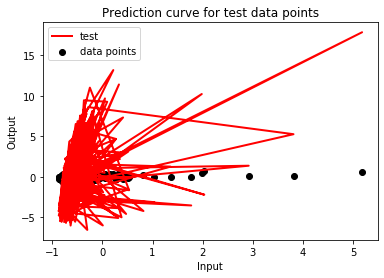

In [73]:
# plot of test data points
plt.scatter(x_test.mean(1),y_test,color='k',label='data points')
plt.plot(x_test.mean(1),preds,'r',label='test',linewidth=2)

plt.title('Prediction curve for test data points')
plt.xlabel('Input')
plt.ylabel('Output')

plt.legend()

plt.grid(False)

plt.show()